作業1：使用 LSTM 模型預測股票未來價格，自訂窗口大小，並分析預測效果。

In [1]:
!pip install yfinance
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.0 MB/s eta 0:00:00


請輸入股票代號: 2330


[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,2020-01-02 00:00:00+00:00,306.430054,339.0,339.0,332.5,332.5,31754120
1,2020-01-03 00:00:00+00:00,306.882111,339.5,345.0,335.5,344.0,41811268
2,2020-01-06 00:00:00+00:00,300.102631,332.0,334.5,332.0,333.0,45343057
3,2020-01-07 00:00:00+00:00,297.842896,329.5,333.0,326.5,332.5,50879181
4,2020-01-08 00:00:00+00:00,297.842896,329.5,333.0,325.0,325.0,37567748
...,...,...,...,...,...,...,...
1176,2024-11-06 00:00:00+00:00,1060.000000,1060.0,1080.0,1040.0,1050.0,55349259
1177,2024-11-07 00:00:00+00:00,1065.000000,1065.0,1075.0,1050.0,1050.0,43975446
1178,2024-11-08 00:00:00+00:00,1090.000000,1090.0,1090.0,1080.0,1085.0,37099479


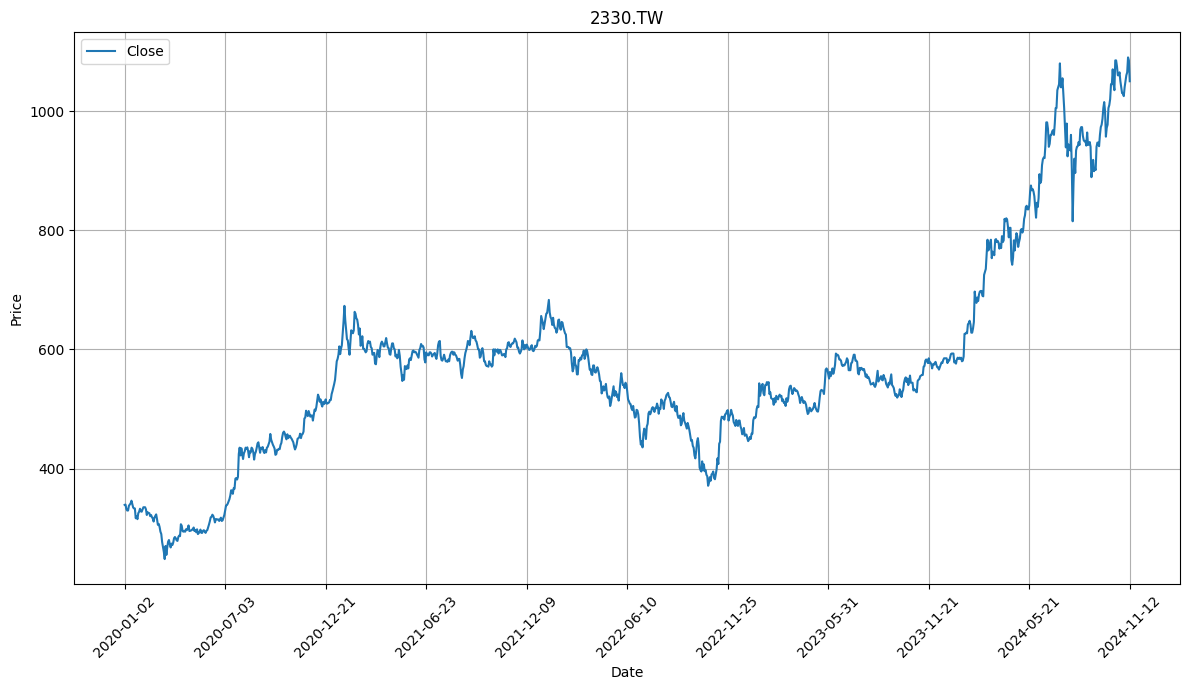

In [7]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 輸入股票代號
stock_id = input("請輸入股票代號: ")+ ".TW"

'''今天往前算幾天'''
# 計算起始日期和結束日期（今天的日期和12個月前的日期）
#end_date = dt.date.today()
#start_date = end_date - dt.timedelta(days=365)

'''抓取特定時間'''
start_date = dt.datetime(2020, 1, 1)  # 指定的開始日期
end_date = dt.datetime(2024, 11, 13)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間\
df = yf.download(stock_id, start=start_date, end=end_date).reset_index()

data = df['Close'].values
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
df

輸入預測窗口大小:20
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0317 - val_loss: 0.0131
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015 - val_loss: 0.0059
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.1345e-04 - val_loss: 0.0030
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.7317e-04 - val_loss: 0.0023
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 5.3938e-04 - val_loss: 0.0022
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 4.7986e-04 - val_loss: 0.0019
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 4.7747e-04 - val_loss: 0.0035
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.6832e-04 - val_loss: 0.0022
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.9384e-04 - val_loss: 0.0025
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.6190e-04 - val_loss: 0.0022
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.4829e-04 - val_loss: 0.0019
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━

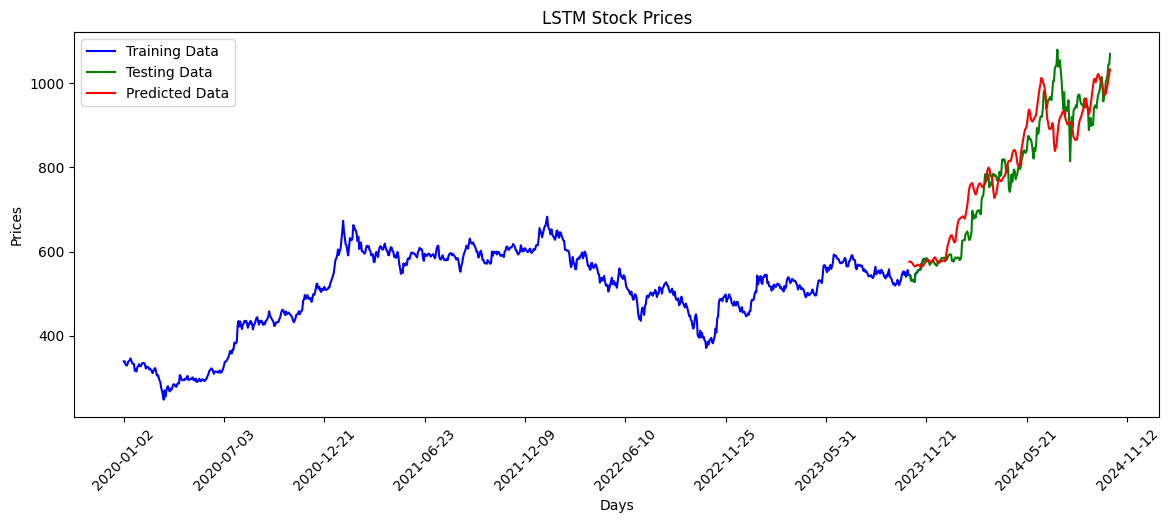

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 載入並處理資料
data = df
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# 定義參數
#window_size = 20  # 使用過去 20 天預測隔天價格
window_size = int(input("輸入預測窗口大小:"))
train_ratio = 0.8
train_size = int(len(scaled_data) * train_ratio)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - window_size:]

# 創建序列
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

# 調整形狀以符合 LSTM 模型的輸入
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 建立 LSTM 模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# 進行預測
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# 將預測結果反轉回原始比例
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# 調整 test_data 和索引的長度一致
plt.figure(figsize=(14, 5))

# 反轉 train_data 並繪製
plt.plot(data.index[:train_size], scaler.inverse_transform(train_data), color="blue", label="Training Data")

# 確保 test_data 與索引的長度一致
adjusted_index = data.index[train_size - window_size:train_size - window_size + len(test_predictions)]
plt.plot(adjusted_index, scaler.inverse_transform(test_data[:len(test_predictions)]), color="green", label="Testing Data")

# 繪製預測數據
plt.plot(adjusted_index, test_predictions, color="red", label="Predicted Data")

plt.title("LSTM Stock Prices")
# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

使用 Transformer 模型預測股價漲跌，自訂窗口大小，並分析預測結果。

請輸入股票代號: 2330


[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,2020-01-02 00:00:00+00:00,306.430054,339.0,339.0,332.5,332.5,31754120
1,2020-01-03 00:00:00+00:00,306.882111,339.5,345.0,335.5,344.0,41811268
2,2020-01-06 00:00:00+00:00,300.102631,332.0,334.5,332.0,333.0,45343057
3,2020-01-07 00:00:00+00:00,297.842896,329.5,333.0,326.5,332.5,50879181
4,2020-01-08 00:00:00+00:00,297.842896,329.5,333.0,325.0,325.0,37567748
...,...,...,...,...,...,...,...
1176,2024-11-06 00:00:00+00:00,1060.000000,1060.0,1080.0,1040.0,1050.0,55349259
1177,2024-11-07 00:00:00+00:00,1065.000000,1065.0,1075.0,1050.0,1050.0,43975446
1178,2024-11-08 00:00:00+00:00,1090.000000,1090.0,1090.0,1080.0,1085.0,37099479


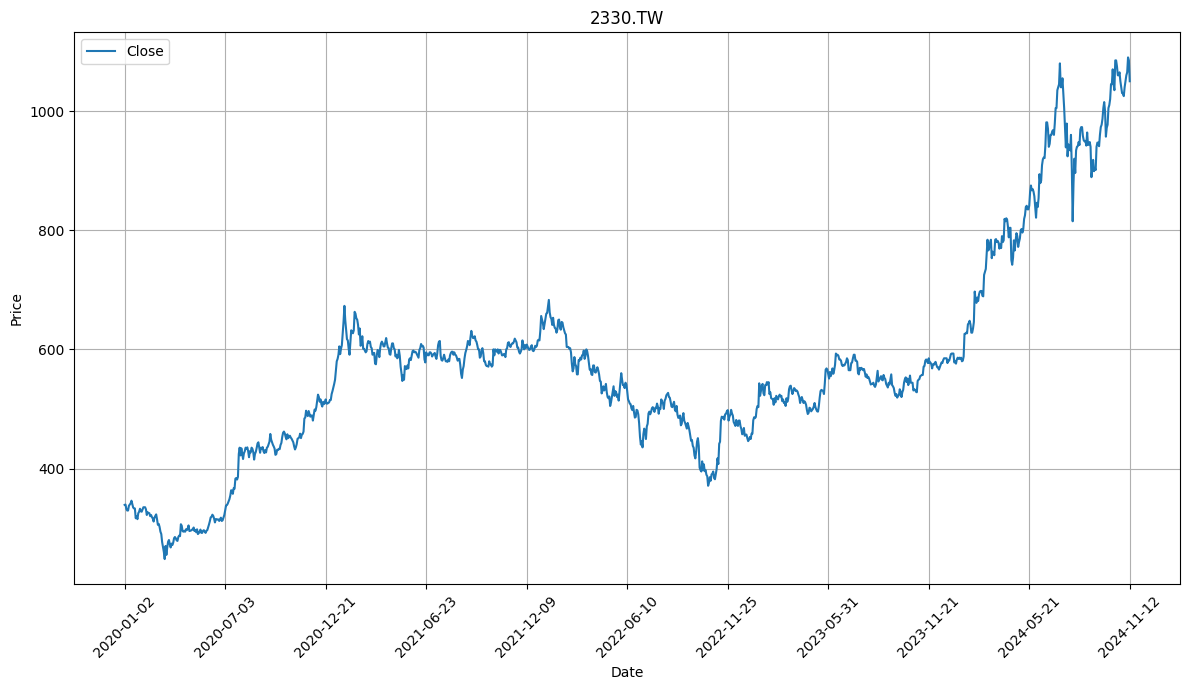

In [23]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 輸入股票代號
stock_id = input("請輸入股票代號: ")+ ".TW"

'''今天往前算幾天'''
# 計算起始日期和結束日期（今天的日期和12個月前的日期）
#end_date = dt.date.today()
#start_date = end_date - dt.timedelta(days=365)

'''抓取特定時間'''
start_date = dt.datetime(2020, 1, 1)  # 指定的開始日期
end_date = dt.datetime(2024, 11, 13)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間\
df = yf.download(stock_id, start=start_date, end=end_date).reset_index()

data = df['Close'].values
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
df

輸入預測窗口大小:20
Epoch 1/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 1.2727 - val_loss: 0.1343
Epoch 2/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0376 - val_loss: 0.1321
Epoch 3/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0093 - val_loss: 0.0666
Epoch 4/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0058 - val_loss: 0.0230
Epoch 5/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0039 - val_loss: 0.0093
Epoch 6/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0030 - val_loss: 0.0071
Epoch 7/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0028 - val_loss: 0.0088
Epoch 8/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0030 - val_loss: 0.0062
Epoch 9/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0025 - val_loss: 0.0065
Epoch 10/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 11/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0027 - val_loss: 0.0036
Epoch 12/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 

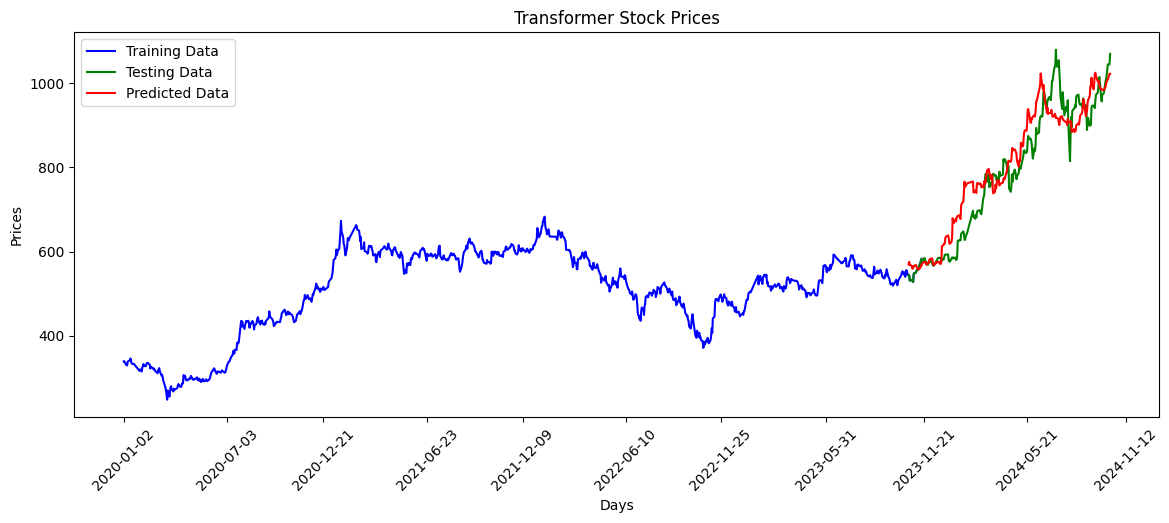

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LayerNormalization, Dropout, Input, MultiHeadAttention , Add , GlobalAveragePooling1D
from tensorflow.keras.models import Model

# 載入並處理資料
data = df.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# 設定參數
window_size = int(input("輸入預測窗口大小:"))
train_ratio = 0.8
train_size = int(len(scaled_data) * train_ratio)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - window_size:]


# 創建序列
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

# 位置編碼函數
def positional_encoding(sequence_length, d_model):
    pos = np.arange(sequence_length)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])  # 偶數索引使用 sin
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])  # 奇數索引使用 cos
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)


# Transformer 模型定義
def transformer_model(input_shape, d_model=64, num_heads=8, ff_dim=128):
    inputs = Input(shape=input_shape)
    seq_len = input_shape[0]

    # 位置編碼加到輸入
    pos_encoding = positional_encoding(seq_len, d_model)
    x = Dense(d_model)(inputs)
    x += pos_encoding[:, :seq_len, :]

    # 多頭注意力 + 前饋網路
    x = LayerNormalization(epsilon=1e-6)(x)
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(x, x)
    attn_output = Dropout(0.1)(attn_output)
    x = Add()([x, attn_output])  # 殘差連接

    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(d_model)(x)
    x = Add()([x, attn_output])  # 殘差連接

    # 聚合並輸出
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(1)(x)
    return Model(inputs=inputs, outputs=outputs)

# 建立和編譯模型
model = transformer_model((window_size, 1))
model.compile(optimizer='adam', loss='mean_squared_error')



# 訓練模型
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

# 進行預測

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print("Train predictions range:", train_predictions.min(), train_predictions.max())
print("Test predictions range:", test_predictions.min(), test_predictions.max())


# 將預測結果反轉回原始比例
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# 繪製結果
plt.figure(figsize=(14, 5))

# 繪製訓練數據
plt.plot(data.index[:train_size], scaler.inverse_transform(train_data), color="blue", label="Training Data")

# 繪製測試數據
adjusted_index = data.index[train_size - window_size:train_size - window_size + len(test_predictions)]
plt.plot(adjusted_index, scaler.inverse_transform(test_data[:len(adjusted_index)]), color="green", label="Testing Data")

# 繪製預測數據
plt.plot(adjusted_index, test_predictions[:len(adjusted_index)], color="red", label="Predicted Data")

# 設定 x 軸的日期標籤
num = 10  # 控制顯示的日期數量
dates = data.index.strftime('%Y-%m-%d')
plt.xticks(dates[::len(dates)//num],  # 設定在 x 軸上顯示標籤的位置
           dates[::len(dates)//num],         # 設定顯示在 x 軸上的日期標籤
           rotation=45)                      # 日期標籤旋轉 45 度

# 設定標題和標籤
plt.title("Transformer Stock Prices")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()
